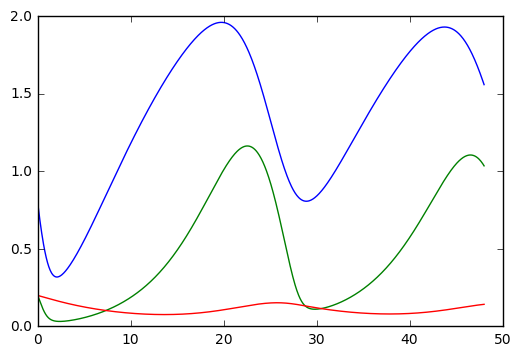

In [70]:
#Task2:1(a)Intrinsic “Circadian Clock” For Different Transport Rates
#I just tried a little bit. I don't know whether it is okay or not

import scipy as sp
import scipy.integrate as integrate

vs = 1.5
vm = 1.5
vd = 1.0
ks = 0.5
k = 0.2
km = 0.15
kd = 0.15
kin = 0.02
kout = 0.1
n = 4


def freq(y,t):
    M0 = y[0]
    Fc0= y[1]
    Fn0= y[2]
    M = (vs*(k**n))/((k**n)+(Fn0**n)) - (vm*M0/(km+M0))
    Fc = ks*M0 - (vd*Fc0/(kd+Fc0)) - (kin*Fc0) + (kout*Fn0)
    Fn = (kin*Fc0) - (kout*Fn0)
    return [M, Fc, Fn]


start = 0.0
end = 48.0
steps = 1000
time = np.linspace(start, end, steps)

y= [0.8, 0.2, 0.2]
y1=sp.integrate.odeint(freq,y,time)

#plt.figure()
plt.plot (time,y1[:,0], 'b', time,y1[:,1], 'g', time,y1[:,2], 'r')
plt.show() 



1000
[23.975975975975974]
23.975975976


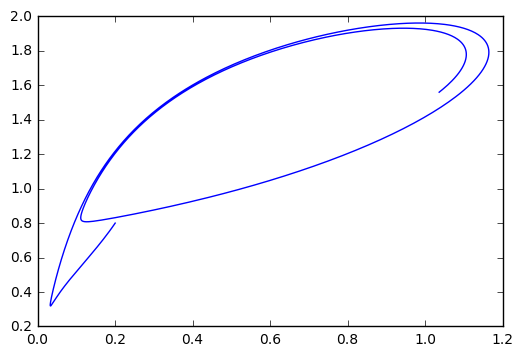

In [71]:
#Task2:1(b) Finding the maximum values
Fc_array = y1[:,1]
M_array = y1[:,0]
T_eve = []
max_Fc = []
period = []
print (len(Fc_array))

for i in range(len(Fc_array)):
    if i != 0 and i != (len(Fc_array)-1):
        if Fc_array[i]>Fc_array[i-1] and Fc_array[i]>Fc_array[i+1]:
            T_eve.append(time[i])
            max_Fc.append(Fc_array[i])
                    
for j in range(len(T_eve)-1):
    p = T_eve[j+1]-T_eve[j]
    period.append(p)

print(period)
mean_period = np.mean(period)
print(mean_period)

interval = period[0] /4
qtime = [round(T_eve[0]-interval,1),round(T_eve[0],1),round(T_eve[0]+interval,1), round(T_eve[0]+2*interval,1)]
qM=[]
qFc=[]

for z in range(len(time)):
    if round(time[z],1) in qtime:
        qM.append(M_array[z])
        qFc.append(Fc_array[z])
plt.figure()
plt.plot(Fc_array, M_array)
plt.show()
